In [1]:
# Import libraries and load dataset
import os
import sys
import importlib
module_path = os.path.abspath(os.path.join('../..'))
if module_path not in sys.path:
    sys.path.append(module_path)

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import statsmodels.api as sm

import common.common as common
importlib.reload(common)

df = pd.read_csv("Data.csv")

yr = list(df.yr)
df = df.set_index("yr")
df["yr"] = yr
df

,inbtou_volume,inbtou_volume_ov,inbtou_volume_sd,inbtou_spending,covid19_cases,covid19_deaths,covid19_mortality,yr
yr,,,,,,,,
2010,1890000.0,290000.0,1600000.0,531600000.0,0,0,0.000000,2010
2011,1710000.0,310000.0,1400000.0,565600000.0,0,0,0.000000,2011
2012,1830000.0,320000.0,1510000.0,641500000.0,0,0,0.000000,2012
2013,1730000.0,350000.0,1380000.0,670800000.0,0,0,0.000000,2013
2014,1990000.0,380000.0,1610000.0,706800000.0,0,0,0.000000,2014
2015,2110000.0,390000.0,1720000.0,726800000.0,0,0,0.000000,2015
2016,2100000.0,390000.0,1710000.0,737000000.0,0,0,0.000000,2016
2017,2150000.0,420000.0,1730000.0,789600000.0,0,0,0.000000,2017
2018,2380000.0,460000.0,1920000.0,849400000.0,0,0,0.000000,2018


Estimated COVID-19 effect: -1744666 ± 129727 (95% confidence)


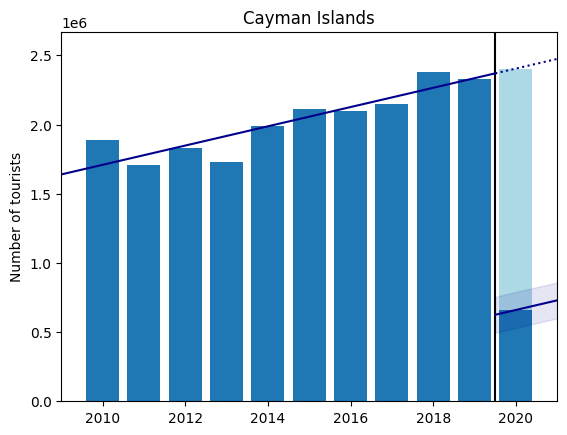

                            OLS Regression Results                            
Dep. Variable:      log_inbtou_volume   R-squared:                       0.981
Model:                            OLS   Adj. R-squared:                  0.976
Method:                 Least Squares   F-statistic:                     204.1
Date:                Wed, 26 Apr 2023   Prob (F-statistic):           1.37e-07
Time:                        03:34:41   Log-Likelihood:                 18.096
No. Observations:                  11   AIC:                            -30.19
Df Residuals:                       8   BIC:                            -29.00
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept       -54.3901     12.146     -4.478

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/scipy/stats/_stats_py.py:1736: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=11
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/scipy/stats/_stats_py.py:1736: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=11
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/scipy/stats/_stats_py.py:1736: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=11
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


In [2]:
# Set up plot
plt.title('Cayman Islands')
plt.ylabel('Number of tourists')
plt.xlim(2009, 2021)
y_name = 'inbtou_volume'

# Filter out NaN data
_df = pd.DataFrame(df).loc[df[y_name].notna()]

# Generate difference-in-differences plot
effect, stderr = common.gen_did_plot(_df, y_name)
print(f"Estimated COVID-19 effect: {int(effect)} ± {int(stderr)} (95% confidence)")

# Render plot
plt.show()

# Run OLS regression
common.run_covid19_regression(_df, y_name, log_level=True)

Estimated COVID-19 effect: -380000 ± 16411 (95% confidence)


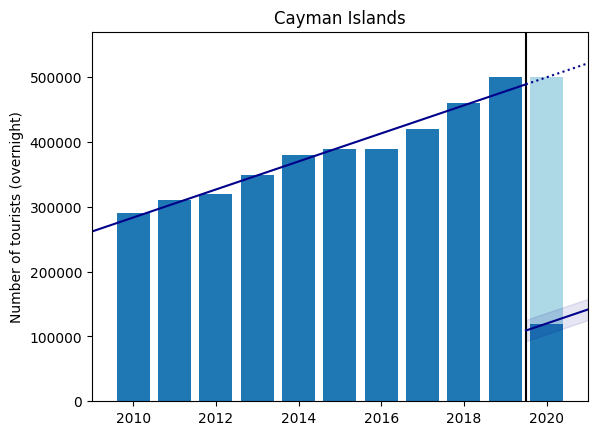

                             OLS Regression Results                             
Dep. Variable:     log_inbtou_volume_ov   R-squared:                       0.996
Model:                              OLS   Adj. R-squared:                  0.995
Method:                   Least Squares   F-statistic:                     905.5
Date:                  Wed, 26 Apr 2023   Prob (F-statistic):           3.74e-10
Time:                          03:34:52   Log-Likelihood:                 25.354
No. Observations:                    11   AIC:                            -44.71
Df Residuals:                         8   BIC:                            -43.51
Df Model:                             2                                         
Covariance Type:              nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept      -101.6283  

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/scipy/stats/_stats_py.py:1736: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=11
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/scipy/stats/_stats_py.py:1736: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=11
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/scipy/stats/_stats_py.py:1736: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=11
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


In [3]:
# Set up plot
plt.title('Cayman Islands')
plt.ylabel('Number of tourists (overnight)')
plt.xlim(2009, 2021)
y_name = 'inbtou_volume_ov'

# Filter out NaN data
_df = pd.DataFrame(df).loc[df[y_name].notna()]

# Generate difference-in-differences plot
effect, stderr = common.gen_did_plot(_df, y_name)
print(f"Estimated COVID-19 effect: {int(effect)} ± {int(stderr)} (95% confidence)")

# Render plot
plt.show()

# Run OLS regression
common.run_covid19_regression(_df, y_name, log_level=True)

Estimated COVID-19 effect: -1364666 ± 127657 (95% confidence)


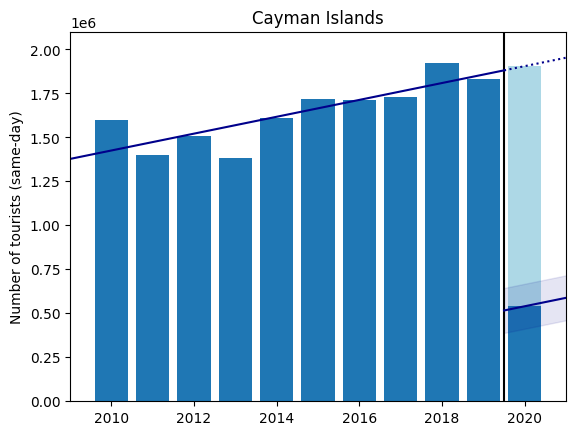

                             OLS Regression Results                             
Dep. Variable:     log_inbtou_volume_sd   R-squared:                       0.970
Model:                              OLS   Adj. R-squared:                  0.963
Method:                   Least Squares   F-statistic:                     131.3
Date:                  Wed, 26 Apr 2023   Prob (F-statistic):           7.64e-07
Time:                          03:34:59   Log-Likelihood:                 15.858
No. Observations:                    11   AIC:                            -25.72
Df Residuals:                         8   BIC:                            -24.52
Df Model:                             2                                         
Covariance Type:              nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept       -44.4099  

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/scipy/stats/_stats_py.py:1736: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=11
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/scipy/stats/_stats_py.py:1736: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=11
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/scipy/stats/_stats_py.py:1736: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=11
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


In [4]:
# Set up plot
plt.title('Cayman Islands')
plt.ylabel('Number of tourists (same-day)')
plt.xlim(2009, 2021)
y_name = 'inbtou_volume_sd'

# Filter out NaN data
_df = pd.DataFrame(df).loc[df[y_name].notna()]

# Generate difference-in-differences plot
effect, stderr = common.gen_did_plot(_df, y_name)
print(f"Estimated COVID-19 effect: {int(effect)} ± {int(stderr)} (95% confidence)")

# Render plot
plt.show()

# Run OLS regression
common.run_covid19_regression(_df, y_name, log_level=True)